In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('default')

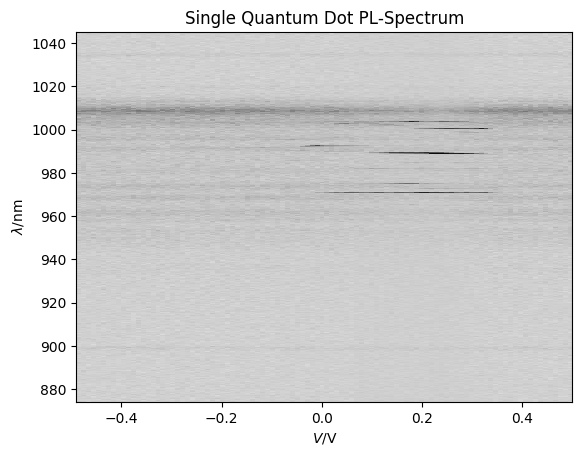

In [23]:
#data = np.loadtxt("data/40nw/qd1-m0.5-0.5-0.01(2s).txt")
#data = np.loadtxt("data/60nw/qd1-m0.5-0.5-0.01(3s).txt")
#data = np.loadtxt("data/400nW/qd4-m0.5-0.5-0.01.txt")
data = np.loadtxt("data/400nW/qd3-m0.5-0.5-0.01.txt")

# the voltages (x-axis)
vs = -0.5
ve = 0.5
dv = 0.01
x = np.arange(vs, ve+dv, dv)

# the wavelengths (y-axis)
N = data.shape[0]/x.shape[0]
y = data[:N,0]

# the intensities for (x, y)
z = data[0:,1].reshape(x.shape[0], -1).T

# chop first column
z = z[:, 1:]
x = x[1:]

# standardize
z = (z - np.mean(z, axis=0)) / np.std(z, axis=0)
# min max scale
#z = z - z.min(axis=0)
#z = z / z.max(axis=0)
#z = np.log(z)
z = z.max() - z # invert

plt.imshow(z, cmap='gray', interpolation="none", 
           extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.xlabel(r"$V/\mathrm{V}$")
plt.ylabel(r"$\lambda/\mathrm{nm}$")
plt.title(r"Single Quantum Dot PL-Spectrum")

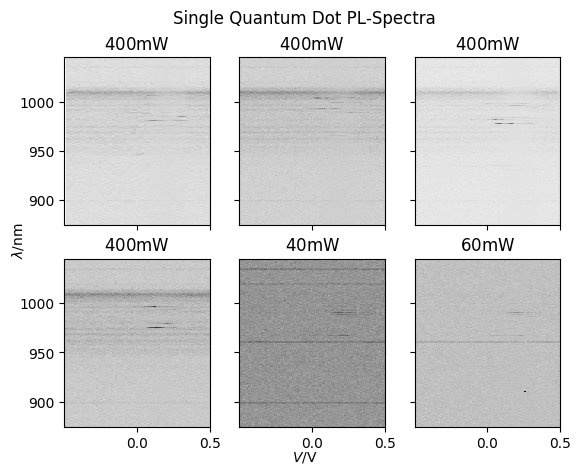

In [3]:
measurements = [
    # (filename, v_min, v_max, dv, power)
    #("data/400nW/qd1.txt", -0.5, 0.5, 0.02, 400),
    ("data/400nW/qd2-m0.5-0.5-0.02.txt", -0.5, 0.5, 0.02, 400),
    ("data/400nW/qd3-m0.5-0.5-0.01.txt", -0.5, 0.5, 0.01, 400),
    ("data/400nW/qd4-m0.5-0.5-0.01.txt", -0.5, 0.5, 0.01, 400),
    ("data/400nW/qd5-m0.5-0.5-0.01.txt", -0.5, 0.5, 0.01, 400),
    ("data/40nw/qd1-m0.5-0.5-0.01(2s).txt", -0.5, 0.5, 0.01, 40),
    ("data/60nw/qd1-m0.5-0.5-0.01(3s).txt", -0.5, 0.5, 0.01, 60),
]

"""
TODO:
    - reverse axis for wavelen (and maybe use energies instead of wavelens)
    - identifiy X0, X-1, X+1 states (negative voltage => hole comes in => X+1 state)
    - calculate the energies with the formulas from the document (use literature to get values
        for the band gap, etc.)
"""

f, axes = plt.subplots(2, 3, sharex='col', sharey='row')
for row in range(0,2):
    for col in range(0,3):
        fname, vs, ve, dv, p = measurements[row*3+col]
        ax = axes[row, col]
        ax.set_title(r"$%d \mathrm{mW}$" % p)
        
        data = np.loadtxt(fname)

        # the voltages (x-axis)
        x = np.arange(vs, ve+dv, dv)
        
        # the wavelengths (y-axis)
        N = data.shape[0]/x.shape[0]
        y = data[:N,0]

        # the intensities for (x, y)
        z = data[0:,1].reshape(x.shape[0], -1).T

        # chop first column
        z = z[:, 1:]
        x = x[1:]

        # standardize
        z = (z - np.mean(z, axis=0)) / np.std(z, axis=0)
        # min max scale
        #z = z - z.min(axis=0)
        #z = z / z.max(axis=0)
        z = z.max() - z # invert

        ax.imshow(z, cmap='gray', interpolation="none", 
                   extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')

f.text(0.5, 0.04, r"$V/\mathrm{V}$", ha='center')
f.text(0.04, 0.5, r"$\lambda/\mathrm{nm}$", va='center', rotation='vertical')
plt.suptitle(r"Single Quantum Dot PL-Spectra")

f.savefig("pl_spectra.pdf")